# Ranked Retrieval Coursework by RahmanMT


## Introduction
This ranked retrival process uses tf_idf to score every term_document pair. 
breif overview:
1. Index the documents' terms and create a postings list containing every document terms and it's tf_idf score
2. Convert query into a vector and assign every term a tf_idf score
3. Calculate cosine(query,document) for all documents, cosine angle is calculated by a.b/|a|.|b|
4. Order the results in descending order and retrive top n results (default n=10)
5. Display results

## Code

#### Imports

In [11]:
import re
import os
import math
import numpy as np
import operator
from collections import OrderedDict

#### Create class and class variables

In [10]:
class Retrieval:
    documents = []   

The `documents` list will contain the strings for all the documents, this is to reduce the number of read operations

In [15]:
document_frequency = {}

The `document_frequency` dict will contain all the terms and it's corresponding inverse document frequency score. Due to repeating terms using a dict will be faster than calculating the document frequency everytime it is required

In [16]:
PATH_TO_DOCS = "bbcsport/docs/"

The `PATH_TO_DOCS` is just a string representation of the path to the folder containing the documents. 

#### Helper functions

In [17]:
def read_file(path, docid):       
    files = sorted(os.listdir(path))
    f = open(os.path.join(path, files[docid]), 'r', encoding='latin-1')
    s = f.read()
    f.close()
    return s.lower()

Returns the requested document in a string format

In [36]:
def tokenize(string):
    DELIM = '[ \n\t0123456789;:.,/\(\)\"\'-]+'
    tokens = re.split(DELIM, string.lower())
    if '' in tokens:
        # Removes any empty strings
        tokens.remove('')
    # Remove duplicates and return
    return list(dict.fromkeys(tokens))

Tokenizes the input string by normalising and removing duplicates
Normalize by removing capitals and removing commas an delimiters

In [37]:
@staticmethod
def calculate_term_freq(token, doc):     
    return doc.count(token)

Calculates the number of times the token appears in the document string, since it makes no changes to the class it is static

In [23]:
def calculate_doc_freq(self, token, N, ):     
        # Check if token idf has already been calculated before
        if token in self.document_frequency:
            return self.document_frequency[token]
        else:
            # calculate document frequency
            df = 0
            for doc in self.documents:
                if token in doc:
                    df += 1
            idf = math.log(N / df, 10)
            # Store idf score to speed up process for high frequency terms
            self.document_frequency.setdefault(token, idf)
        return idf

Calculates the document frequency for a given term (idf).The rarer the term, the higher the score. Since there are many re-occuring terms, they are stored in a dict to reduce processing time

In [24]:
@staticmethod
def calculate_vector_norm(vector):
    n = 0
    for key, value in vector.items():
        n += value ** 2
    norm = math.sqrt(n)
    return norm

Calculates the norm of a vector (also known as the magnitude). The Norm is calculated as follows:
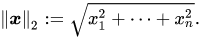
Since these vectors will have very high number of dimensions, I used a loop to square all the values and sum them before sqaure rooting it.

In [25]:
def l2normalize(self, docVectors):        
    # find norm
    norm = self.calculate_vector_norm(docVectors)
    # normalize lengths of vectors
    for key, value in docVectors.items():
        docVectors[key] = value / norm
    return docVectors

Uses the norm to normalize the given vectors by dividing each vector by the norm

#### Initialize documents and document document_frequency

In [26]:
def initialize_documents(self, path):        
    N = len(sorted(os.listdir(path)))
    for docID in range(N):
        s = self.read_file(path, docID)
        self.documents.append(s)            

Reads all the documents and stores them in the list

In [27]:
def initialize_doc_freq(self, N):
    for docID in range(N):
        s = self.documents[docID]
        tokens = self.tokenize(s)
        for t in tokens:
            self.calculate_doc_freq(t, N)

Loops through all the documents, for each document it tokenises the terms. Then for each token it calculates the document frequency score and stores the token and score in the `document_frequency` dict

#### Indexing documents for Ranked Retrieval

In [28]:
def index_text_files_rr(self, path):
    N = len(sorted(os.listdir(path)))
    self.initialize_doc_freq(N)
    postings = {}
    for docID in range(N):
        s = self.documents[docID]
        tokens = self.tokenize(s)
        # Create a template using the keys of the document_frequency dict
        # This will ensure that all doc vectors have same dimensions
        row_data = dict.fromkeys(self.document_frequency, 0)
        for t in tokens:
            # calculate the relevancy score using tf*idf
            tf_idf = self.calculate_term_freq(t, s) * self.document_frequency[t]
            # insert tf_idf score to corresponding terms in dict
            row_data[t] = tf_idf            
        # Normalize the document scores
        normalized_data = self.l2normalize(row_data)
        postings.setdefault(docID, normalized_data)
    return postings

Creates the postings list for ranked retrieval, the postings looks like:
{0: {mccall: 0.23452, england: 0.12980374, something: 0.0} 1: {mccall: 0.0, ...} ..}